## **Importing Libraries** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Data**

In [4]:
df = pd.read_excel(r"C:\Users\rudra\OneDrive\Documents\GitHub\blinkit-end-to-end-data-analysis\data\processed\cleanned_blinkit_grocery_data.xlsx")
df.head()

,item_fat_content,item_identifier,item_type,outlet_establishment_year,outlet_identifier,outlet_location_type,outlet_size,outlet_type,item_visibility,item_weight,sales,rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## **1. Univariate Analysis On Numeric Columns**

### A. What is the distribution of sales?

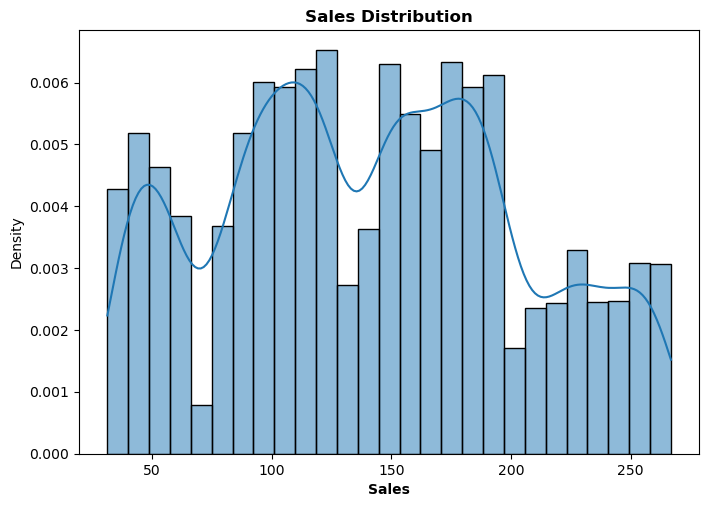

In [7]:
plt.figure(figsize = (8,5.5))
sns.histplot(data = df, x = 'sales', kde = True, stat = "density")

plt.title("Sales Distribution", weight = "bold")
plt.xlabel("Sales", weight = 'bold')

plt.show()

**Insight:**  

Sales values are widely distributed across low, medium, and high ranges and do not follow a normal distribution. The presence of multiple peaks suggests that sales behavior varies across different product categories and outlet types, indicating heterogeneous sales patterns rather than a single dominant trend.


### B. Are there outliers in sales?

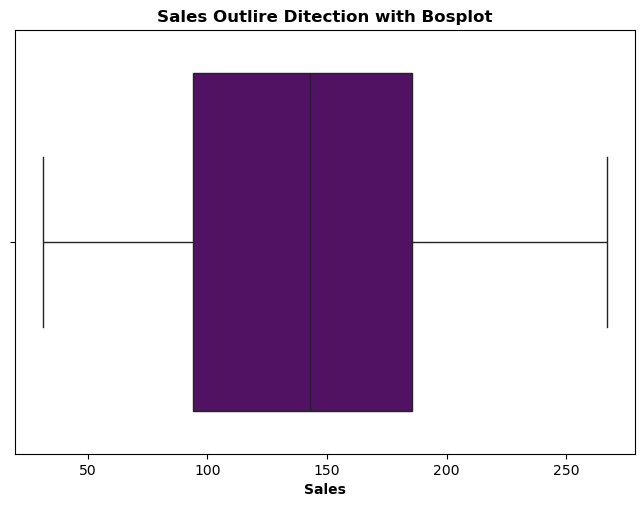

In [10]:
plt.figure(figsize = (8, 5.5))

sns.boxplot(data = df, x = 'sales', color = '#5A0472')

plt.title("Sales Outlire Ditection with Bosplot", weight = 'bold')
plt.xlabel("Sales", weight = 'bold')

plt.show()

**Insight:**  

The boxplot does not indicate the presence of extreme outliers in the sales variable based on the interquartile range (IQR) method. Although sales values vary widely, the higher values fall within the expected range and are not considered anomalous.

### C. What is the distribution of item_visibility?

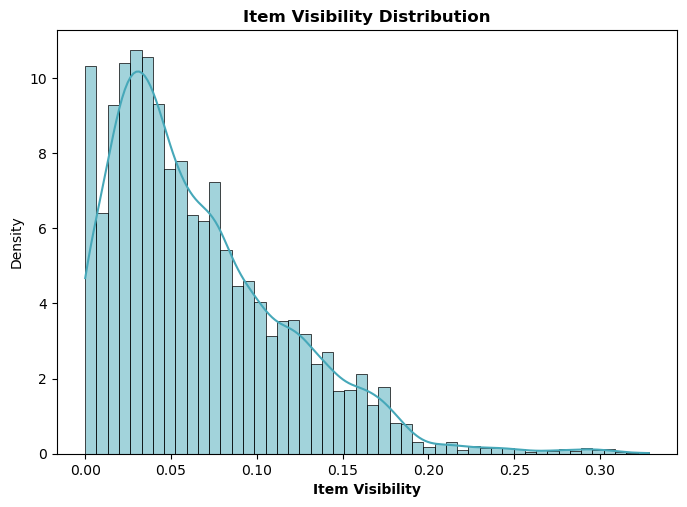

In [13]:
plt.figure(figsize = (8,5.5))

sns.histplot(data = df, x = 'item_visibility', kde = True, stat = 'density', linewidth = 0.5, color = '#46A8B9')

plt.title("Item Visibility Distribution", weight = 'bold')
plt.xlabel("Item Visibility", weight = 'bold')

plt.show()

In [14]:
df['item_visibility'].skew()

1.167089786851848

**Insight:**

- The distribution of item visibility is positively skewed, with a skewness value of approximately **1.17**. 
- Most products have low visibility values concentrated near zero, while a small number of items have higher visibility levels. 
- This indicates that the majority of products receive limited shelf or display exposure, and only a few items are highly visible.


### D. How is item_weight distributed?

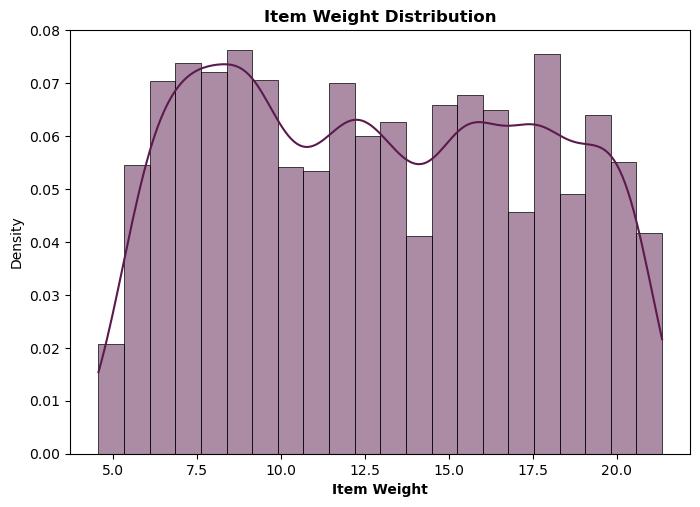

In [17]:
plt.figure(figsize = (8,5.5))

sns.histplot(data = df, x = 'item_weight', kde = True, stat = 'density', linewidth = 0.5, color = '#5B1A4D')

plt.title("Item Weight Distribution", weight = 'bold')
plt.xlabel("Item Weight", weight = 'bold')

plt.show()

**Insight:**

- Item weight shows a broad and balanced distribution, indicating that Blinkit sells products with a wide variety of sizes and packaging weights. 
- There is no evidence of extreme values or clustering, suggesting item weight is unlikely to be a primary driver of sales on its own.


### E. How are ratings distributed?

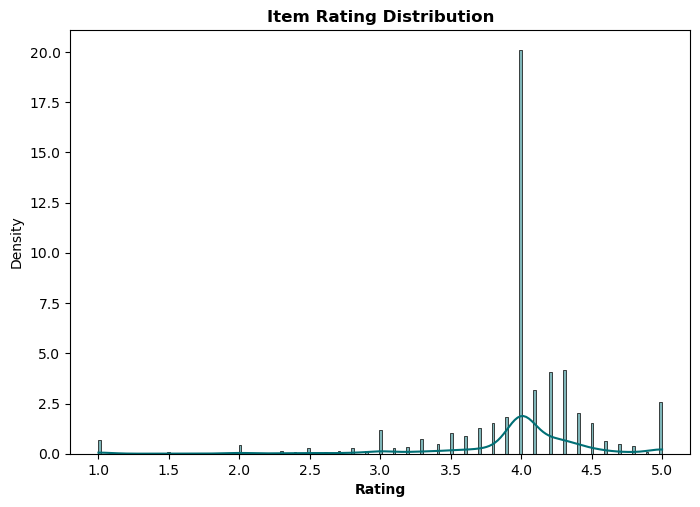

In [20]:
plt.figure(figsize = (8,5.5))

sns.histplot(data = df, x = 'rating', kde = True, stat = 'density', linewidth = 0.5, color = '#006F75')

plt.title("Item Rating Distribution", weight = 'bold')
plt.xlabel("Rating", weight = 'bold')

plt.show()

In [21]:
df['rating'].skew()

-2.1889758534863297

**Insight:**

- The rating distribution is negatively skewed (left-skewed), with a skewness value of approximately -2.2. 
- This indicates that most products receive higher ratings, typically above 3.5, while relatively fewer products have low ratings.
- A rating around 4 is the most common, suggesting generally high customer satisfaction across items.


## **2. Univariate Analysis On Categorical Columns**

### A. How many items fall under each item_type?

In [25]:
item_type_order = df['item_type'].value_counts().index
df['item_type'].value_counts().reset_index().pipe(lambda d: d.set_index(d.index + 1))

,item_type,count
1,Fruits and Vegetables,1232
2,Snack Foods,1200
3,Household,910
4,Frozen Foods,856
5,Dairy,682
6,Canned,649
7,Baking Goods,648
8,Health and Hygiene,520
9,Soft Drinks,445
10,Meat,425


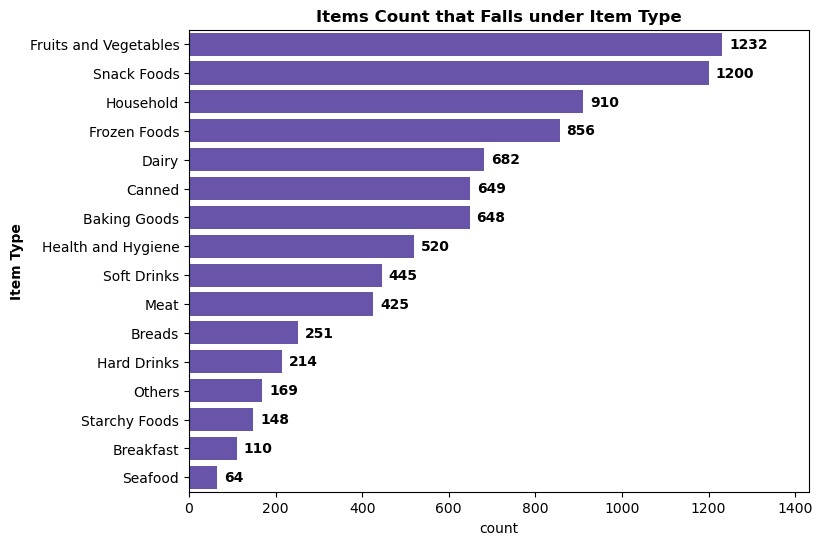

In [26]:
plt.figure(figsize = (8, 6))

ax = sns.countplot(data = df, y = 'item_type', color = '#6047B8', order = item_type_order)

ax.set_xlim(0, df['item_type'].value_counts().max() + 200)
ax.bar_label(ax.containers[0], padding = 5, weight = 'bold')

ax.set_title("Items Count that Falls under Item Type", weight = 'bold')
ax.set_ylabel("Item Type", weight = 'bold')
plt.show()

**Insight:**

- The product assortment is heavily concentrated in a few categories.
- **Fruits and Vegetables** (1,232 items) and **Snack Foods** (1,200 items) together account for a large share of the total products.
- Household (910) and Frozen Foods (856) also have strong representation.
- On the other hand, categories such as Seafood (64), Breakfast (110), and Starchy Foods (148) contribute very little to the overall dataset.
- This imbalance suggests that overall sales trends may be driven mainly by high-volume categories, while smaller categories may require separate analysis to avoid being masked.


### B. Distribution of outlet_type?

In [29]:
outlet_type_inorder = df['outlet_type'].value_counts().index
df['outlet_type'].value_counts().reset_index().pipe(lambda d: d.set_index(d.index + 1))

,outlet_type,count
1,Supermarket Type1,5577
2,Grocery Store,1083
3,Supermarket Type3,935
4,Supermarket Type2,928


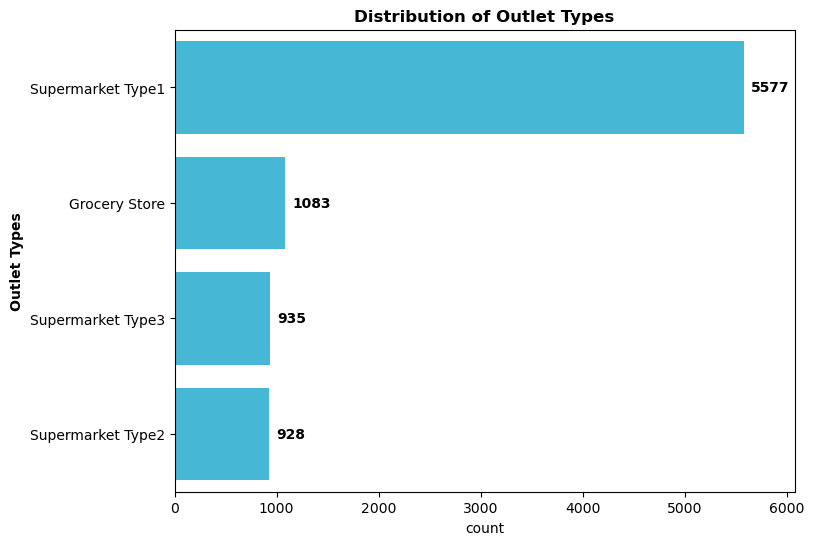

In [30]:
plt.figure(figsize = (8, 6))

ax = sns.countplot(data = df, y = 'outlet_type', color = '#2FC5EE', order = outlet_type_inorder)

ax.set_xlim(0, df['outlet_type'].value_counts().max() + 500)
ax.bar_label(ax.containers[0], padding = 5, weight = 'bold')

ax.set_title("Distribution of Outlet Types", weight = 'bold')
ax.set_ylabel("Outlet Types", weight = 'bold')
plt.show()

**Insight:**

- The dataset is highly dominated by **Supermarket Type1** outlets, which account for a very large share **(5,577)** of all records.
- Other outlet types such as Grocery Stores (1,083), Supermarket Type3 (935), and **Supermarket Type2 (928)** have significantly lower representation.
- This indicates that overall sales patterns in the dataset are likely to be strongly influenced by Supermarket Type1, and comparisons across outlet types should consider this imbalance.


### C. Distribution of outlet_size?

In [33]:
outlet_size_inorder = df['outlet_size'].value_counts().index
df['outlet_size'].value_counts().reset_index().pipe(lambda d: d.set_index(d.index + 1))

,outlet_size,count
1,Medium,3631
2,Small,3139
3,High,1753


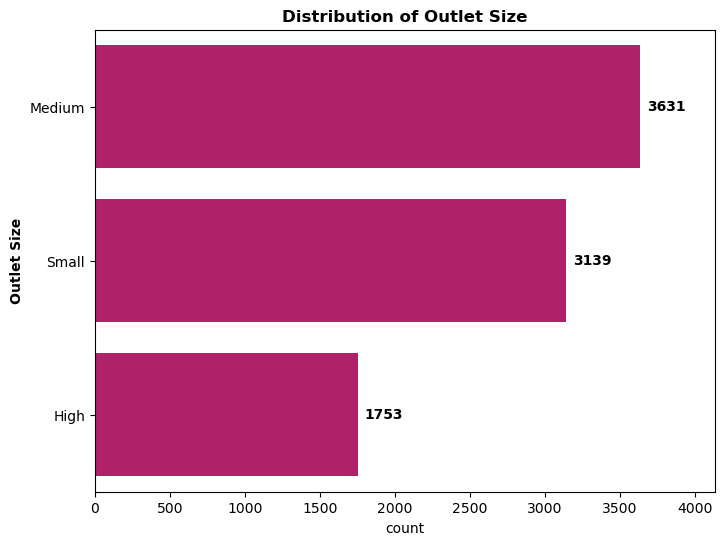

In [34]:
plt.figure(figsize = (8, 6))

ax = sns.countplot(data = df, y = 'outlet_size', color = '#C70A69', order = outlet_size_inorder)
ax.set_xlim(0, df['outlet_size'].value_counts().max() + 500)
ax.bar_label(ax.containers[0], padding = 5, weight = 'bold')

ax.set_title("Distribution of Outlet Size", weight = 'bold')
ax.set_ylabel("Outlet Size", weight = 'bold')
plt.show()

**Insight:**
- **Medium-sized** outlets are the most common, with **3,631 record**s, followed by small outlets with 3,139 records.
- **High-sized** outlets are less frequent, with only **1,753** records.
- This indicates that Blinkit primarily operates through medium and small outlets, which are likely to contribute the majority of total sales.


### D. Distribution of outlet_location_type?

In [37]:
location_type_inorder = df['outlet_location_type'].value_counts().index
df['outlet_location_type'].value_counts().reset_index().pipe(lambda d: d.set_index(d.index + 1))

,outlet_location_type,count
1,Tier 3,3350
2,Tier 2,2785
3,Tier 1,2388


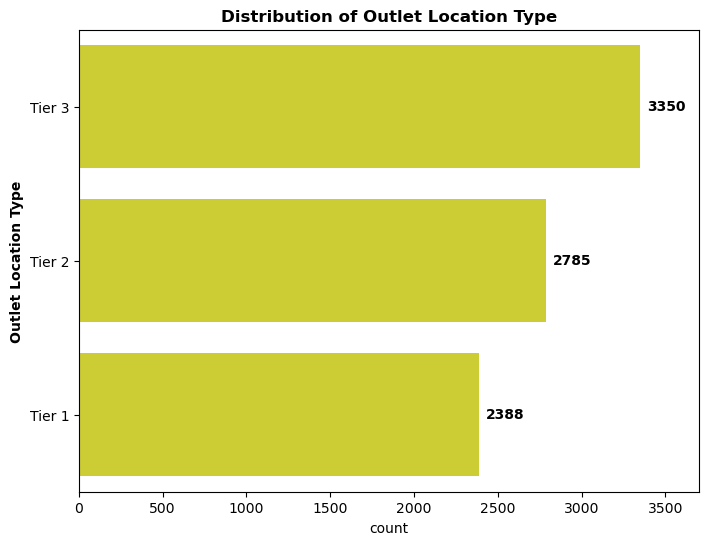

In [38]:
plt.figure(figsize = (8, 6))

ax = sns.countplot(data = df, y = 'outlet_location_type', color = '#E6E61A', order = location_type_inorder)
ax.set_xlim(0, df['outlet_location_type'].value_counts().max()+ 350)
ax.bar_label(ax.containers[0], padding = 5, weight = 'bold')

ax.set_title("Distribution of Outlet Location Type", weight = 'bold')
ax.set_ylabel("Outlet Location Type", weight = 'bold')
plt.show()

**Insight:**

- **Tier 3** locations have the highest number of outlets **(3,350)**, followed by Tier 2 (2,785) and **Tier 1 (2,388)**.
- This indicates that Blinkit has a stronger presence in Tier 2 and Tier 3 cities compared to Tier 1 cities.
- As a result, overall sales patterns may be more influenced by demand from non-metro and semi-urban regions.


### E. Distribution of item_fat_content?

In [41]:
fat_content_inorder = df['item_fat_content'].value_counts().index
df['item_fat_content'].value_counts().reset_index().pipe(lambda d: d.set_index(d.index + 1))

,item_fat_content,count
1,Low Fat,5517
2,Regular,3006


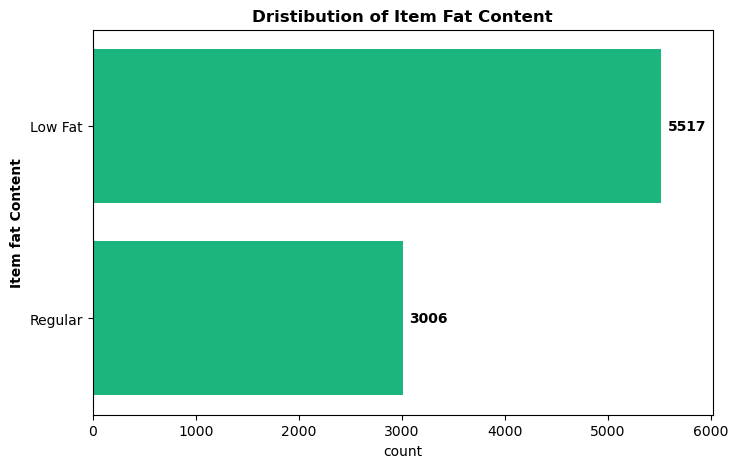

In [42]:
plt.figure(figsize = (8, 5))

ax = sns.countplot(data =df, y = 'item_fat_content', color = '#01D084', order = fat_content_inorder)
ax.set_xlim(0, df['item_fat_content'].value_counts().max() + 500)
ax.bar_label(ax.containers[0], padding = 5, weight = 'bold')

ax.set_title("Dristibution of Item Fat Content", weight = 'bold')
ax.set_ylabel("Item fat Content", weight = 'bold')

plt.show()

**Insight:**

- Low **Fat items** account for a significantly larger share of the dataset **(5,517 items)** compared to **Regular fat items (3,006 items)**.
- This indicates a stronger focus on low-fat product offerings, which may reflect consumer preference for healthier options or strategic product positioning by Blinkit.
- As a result, sales trends may be more influenced by Low Fat items.


## **3. Bivariate Analysis on Sales Vs Categorical Columns**

### A. How does average sales vary by item_type?

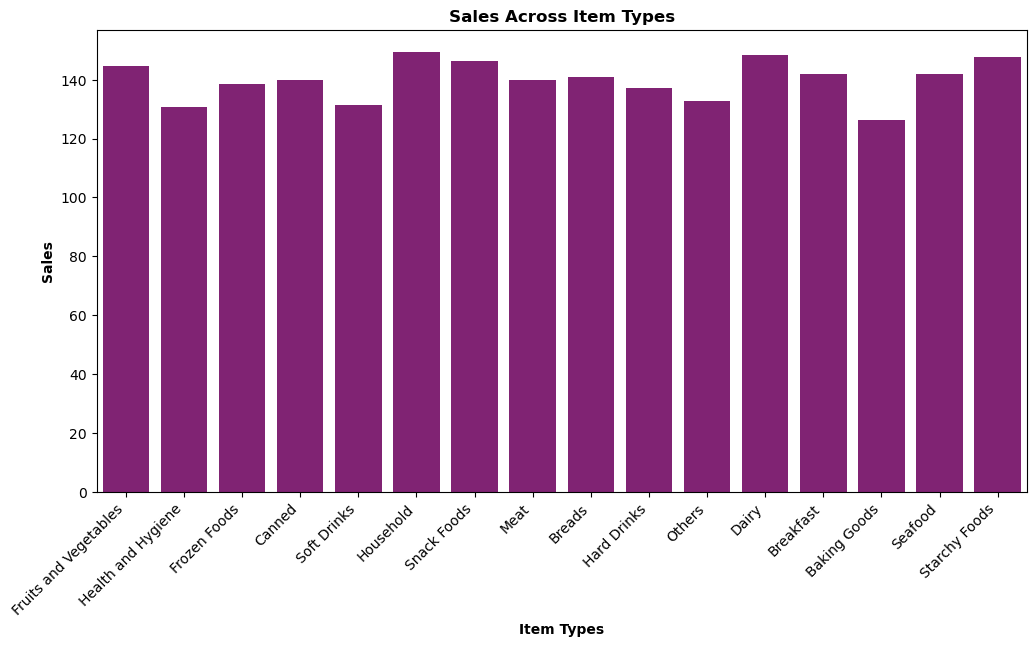

In [46]:
plt.figure(figsize = (12, 6))

sns.barplot(data = df, x = 'item_type', y = 'sales', errorbar = None, color = '#8F147E')

plt.xticks(rotation = 45, ha = 'right')
plt.title("Sales Across Item Types", weight = 'bold')
plt.xlabel("Item Types", weight = 'bold')
plt.ylabel("Sales", weight = 'bold')
plt.show()

**Insight:**

- Average sales across item types are fairly consistent, generally ranging between approximately 125 to 150 units.
- Categories such as Fruits and Vegetables, Household, Dairy, Snack Foods, and Starchy Foods tend to be at the higher end of this range, while categories like Baking Goods and Health and Hygiene show slightly lower average sales.
- This indicates that essential and frequently purchased items contribute more consistently to overall sales performance.


### B. Which outlet_type generates the highest sales?

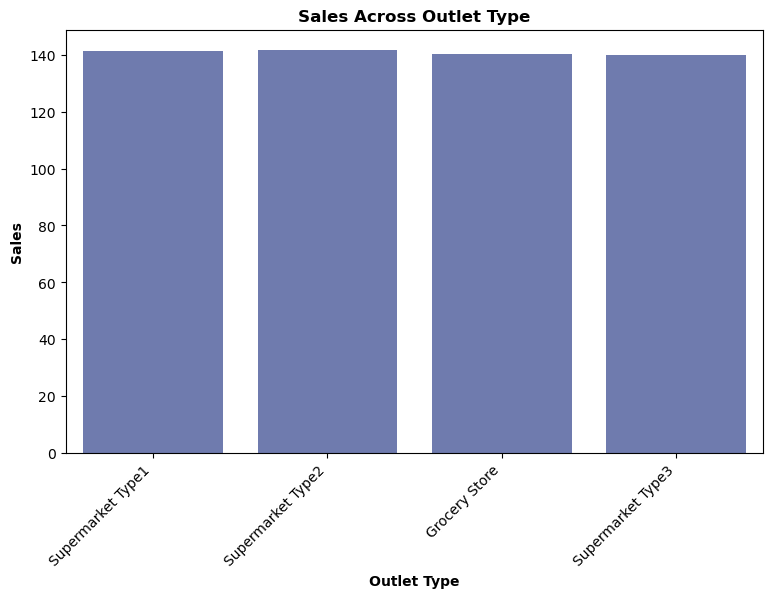

In [49]:
plt.figure(figsize = (9, 5.5))

sns.barplot(data = df, x = 'outlet_type', y = 'sales', color = '#6474B9', errorbar = None)

plt.xticks(rotation = 45, ha = 'right')

plt.title("Sales Across Outlet Type", weight = 'bold')
plt.xlabel('Outlet Type', weight = 'bold')
plt.ylabel('Sales', weight = 'bold')
plt.show()

**Insight:**

- Average sales are remarkably consistent across all outlet types, with each outlet format generating approximately similar sales values.
- This suggests that product-level sales performance does not vary significantly by outlet type, indicating a standardized pricing and demand pattern across grocery stores and supermarket formats.


### C. Does outlet_size affect sales?

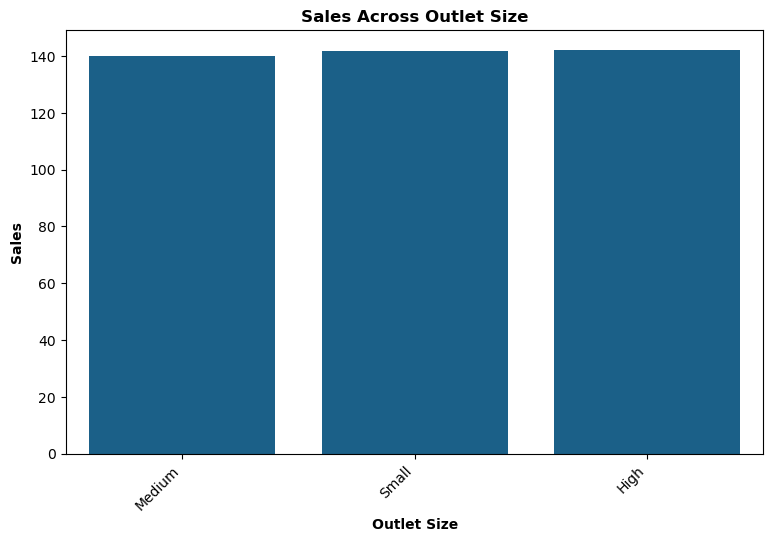

In [52]:
plt.figure(figsize = (9, 5.5))

sns.barplot(data = df, x = 'outlet_size', y = 'sales', errorbar = None, color = '#09659A')

plt.xticks(rotation = 45, ha = 'right')

plt.title("Sales Across Outlet Size", weight = 'bold')
plt.xlabel('Outlet Size', weight = 'bold')
plt.ylabel('Sales', weight = 'bold')
plt.show()

**Insight:**

- Average sales remain nearly identical across small, medium, and high outlet sizes, indicating that outlet size does not have a significant impact on item-level sales.
- This suggests that sales performance is driven more by product demand and pricing rather than the physical size of the outlet.


### D. Do Tier 1, 2, 3 locations show sales differences?

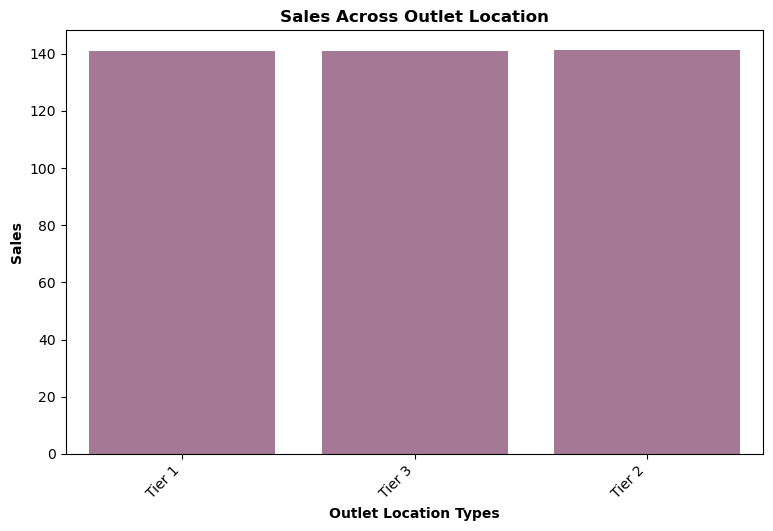

In [55]:
plt.figure(figsize = (9, 5.5))

sns.barplot(data = df, x = 'outlet_location_type', y = 'sales', errorbar = None, color = '#AC7298')

plt.xticks(rotation = 45, ha = 'right')

plt.title("Sales Across Outlet Location", weight = 'bold')
plt.xlabel('Outlet Location Types', weight = 'bold')
plt.ylabel('Sales', weight = 'bold')
plt.show()

**Insight:**

- Average sales are nearly identical across Tier 1, Tier 2, and Tier 3 outlet locations.
- This indicates that Blinkit maintains a highly standardized sales performance across different geographic tiers, with similar pricing and demand patterns regardless of location.


### E. Is there a sales difference between Low Fat vs Regular items?

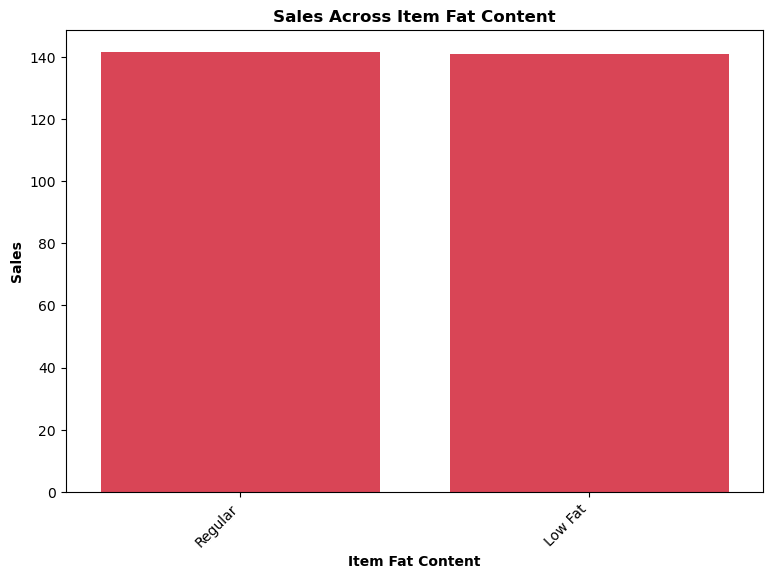

In [58]:
plt.figure(figsize = (9, 6))

sns.barplot(data = df, x = 'item_fat_content', y = 'sales', errorbar = None, color = '#F22C43')

plt.xticks(rotation = 45, ha = 'right')

plt.title("Sales Across Item Fat Content", weight = 'bold')
plt.xlabel("Item Fat Content", weight = 'bold')
plt.ylabel("Sales", weight = 'bold')

plt.show()

**Insight:**

- Average sales for Low Fat and Regular items are nearly identical, indicating that fat content does not significantly influence item-level sales.
- This suggests that customer purchasing behavior on Blinkit is driven more by product type, brand, or convenience rather than fat content preference alone.


## **4. Bivariate Analysis on Sales Vs Numeric Columns**

### A. Relationship between item_visibility and sales?

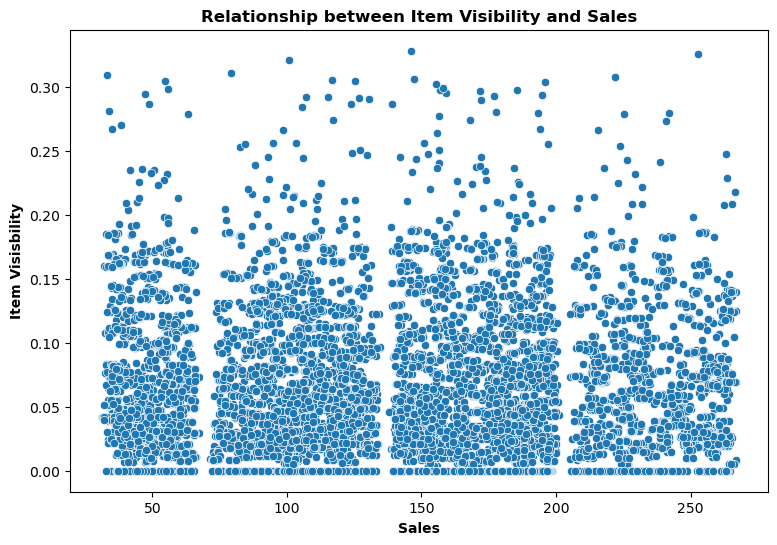

In [62]:
plt.figure(figsize = (9, 6))

sns.scatterplot(data = df,  x = 'sales', y = 'item_visibility')

plt.title('Relationship between Item Visibility and Sales', weight = 'bold')
plt.xlabel('Sales', weight = 'bold')
plt.ylabel('Item Visisbility', weight = 'bold')

plt.show()

**Insight:**

- The scatter plot shows no clear relationship between item visibility and sales.
- Items with both low and high visibility generate similar sales values.
- This indicates that item visibility alone is not a strong driver of sales in this dataset, and other factors may have a greater influence.

### B. Does higher rating lead to higher sales?

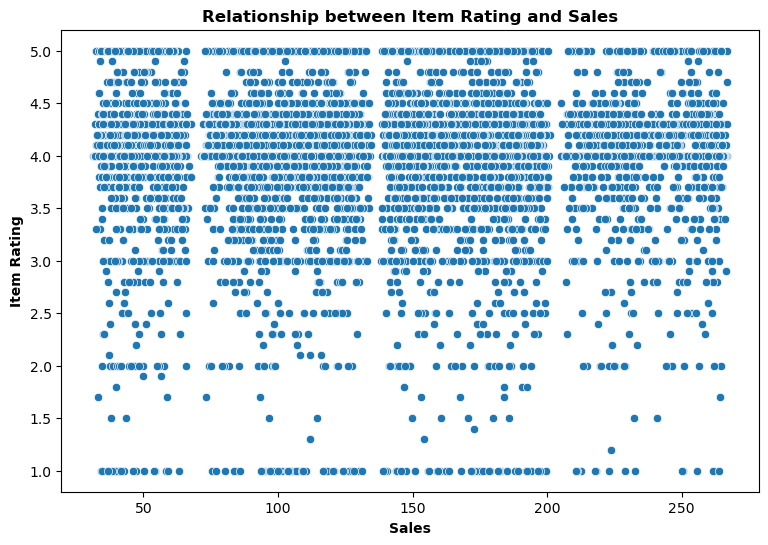

In [65]:
plt.figure(figsize = (9, 6))

sns.scatterplot(data = df,  x = 'sales', y = 'rating')

plt.title('Relationship between Item Rating and Sales', weight = 'bold')
plt.xlabel('Sales', weight = 'bold')
plt.ylabel('Item Rating', weight = 'bold')

plt.show()

**Insight:**

- The scatter plot shows no strong relationship between item rating and sales.
- While items with very low ratings tend to have lower sales, higher ratings alone do not consistently lead to higher sales.
- This indicates that customer ratings may act as a negative filter (poor ratings hurt sales), but they are not the primary driver of high sales.

### C. Relationship between item_weight and sales??

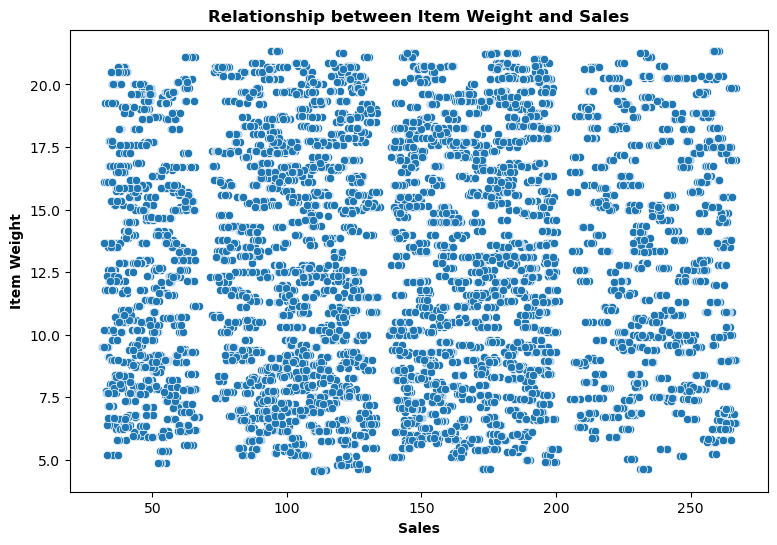

In [68]:
plt.figure(figsize = (9, 6))

sns.scatterplot(data = df,  x = 'sales', y = 'item_weight')

plt.title('Relationship between Item Weight and Sales', weight = 'bold')
plt.xlabel('Sales', weight = 'bold')
plt.ylabel('Item Weight', weight = 'bold')

plt.show()

**Insight:**

- The scatter plot shows no clear relationship between item weight and sales.
- Sales are distributed across all weight ranges, indicating that both lighter and heavier items achieve similar sales levels.
- This suggests that item weight does not significantly influence sales performance and is not a key driver of demand.

### D. Correlation Analysis (Validation of Numeric Relationships)

In [71]:
df.corr(numeric_only = True)

,outlet_establishment_year,item_visibility,item_weight,sales,rating
outlet_establishment_year,1.000000,-0.058087,-0.002218,-0.000654,0.000414
item_visibility,-0.058087,1.000000,-0.009251,-0.001315,0.000798
item_weight,-0.002218,-0.009251,1.000000,0.025970,0.004388
sales,-0.000654,-0.001315,0.025970,1.000000,0.011329
rating,0.000414,0.000798,0.004388,0.011329,1.000000


**Insight:**

- The correlation matrix confirms the findings from the bivariate scatter plots.
- All numerical variables show very weak correlation with sales, with correlation values close to zero.
- This indicates that sales are not strongly driven by individual numerical factors such as item weight, visibility, rating, or outlet establishment year, and are likely influenced by a combination of categorical and business-related factors.

## **5. Multivariate Analysis**

### A. Which item types perform best within each outlet type?

In [75]:
# Total sales by outlet_type and item_type
item_performance = (
    df.groupby(['outlet_type', 'item_type'])['sales']
    .sum()
    .reset_index()
)

# Rank item types within each outlet type
item_performance['rank'] = (
    item_performance
    .groupby('outlet_type')['sales']
    .rank(method='dense', ascending=False)
)

# Select top item per outlet type
top_items_per_outlet = (
    item_performance[item_performance['rank'] == 1]
    .sort_values('sales', ascending=False)
)

top_items_per_outlet


,outlet_type,item_type,sales,rank
22,Supermarket Type1,Fruits and Vegetables,117431.9880,1.0
6,Grocery Store,Fruits and Vegetables,21423.4146,1.0
54,Supermarket Type3,Fruits and Vegetables,20301.3866,1.0
45,Supermarket Type2,Snack Foods,20003.2424,1.0


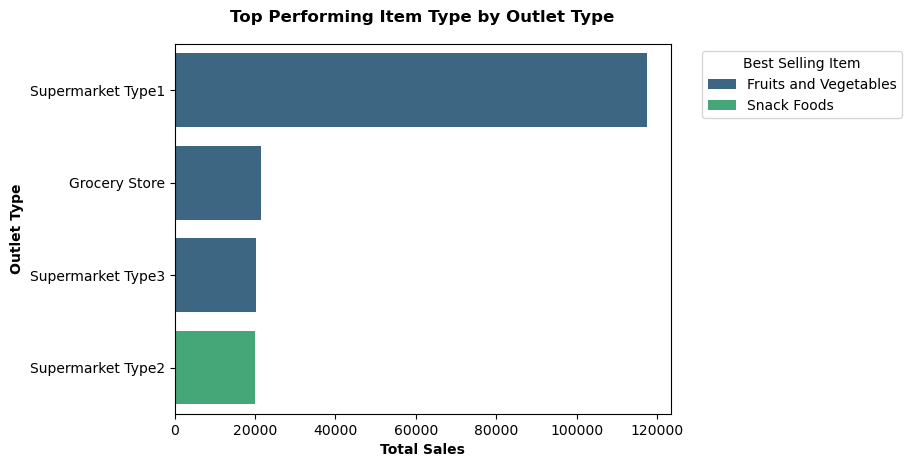

In [76]:
plot = sns.barplot(
    data=top_items_per_outlet, 
    x='sales', 
    y='outlet_type', 
    hue='item_type',  
    palette='viridis',
    dodge=False      
)

# Add titles and labels
plt.title('Top Performing Item Type by Outlet Type', fontsize=12, pad=16, weight = 'bold')
plt.xlabel('Total Sales', fontsize=10, weight = 'bold')
plt.ylabel('Outlet Type', fontsize=10, weight = 'bold')
plt.legend(title='Best Selling Item', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

**Insight: Top Performing Item Types by Outlet Type**

- Fruits and Vegetables is the top-performing item type in three out of four outlet types: Supermarket Type1, Grocery Store, and Supermarket Type3.

- In Supermarket Type1, Fruits and Vegetables generate the highest total sales overall, making it the strongest outlet–item combination in the dataset.

- Supermarket Type2 is the only outlet type where Snack Foods outperform Fruits and Vegetables, indicating a different customer purchase preference in this outlet format.

- This pattern suggests that fresh produce drives sales in most outlet formats, while Supermarket Type2 may cater more to packaged or ready-to-eat products.

- Overall, sales performance is not uniform across outlet types, and the best-selling item category depends on the outlet format.

#### Why in Supermarket Type 1 sold Fruits and Vegetables generate the highest total sales?

In [157]:
count_pivot = df.pivot_table(
    index = 'item_type',
    columns = 'outlet_type',
    values = 'sales',
    aggfunc = 'count'
)

count_pivot['Total'] = count_pivot.sum(axis = 1)
count_pivot = count_pivot.sort_values(by = "Total", ascending = False)
count_pivot = count_pivot.drop(columns = "Total")

count_pivot

outlet_type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
item_type,,,,
Fruits and Vegetables,152,805,135,140
Snack Foods,146,785,132,137
Household,119,597,95,99
Frozen Foods,103,572,92,89
Dairy,92,450,73,67
Canned,73,426,78,72
Baking Goods,85,426,68,69
Health and Hygiene,67,335,58,60
Soft Drinks,54,300,46,45


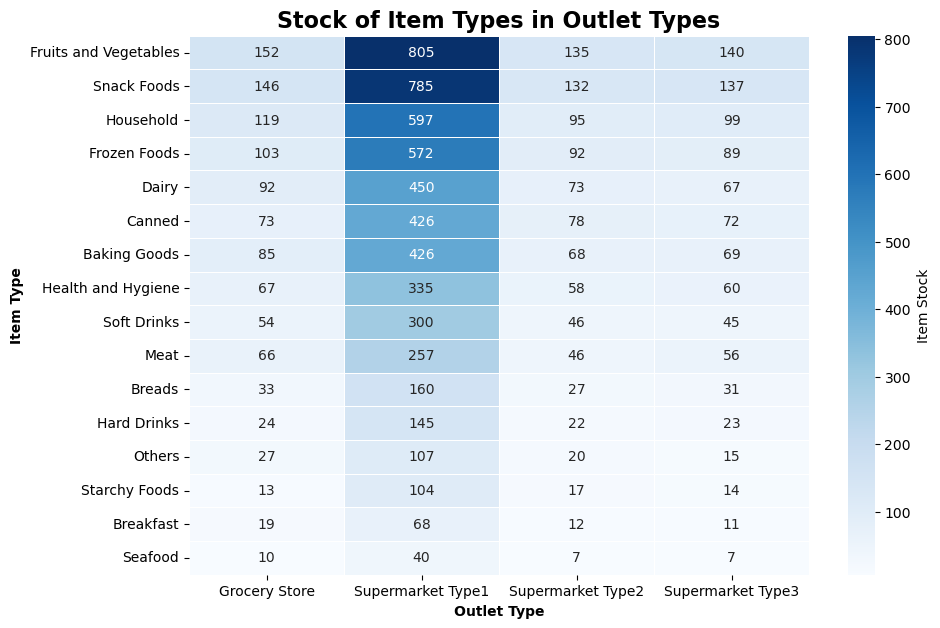

In [166]:
plt.figure(figsize = (10, 7))
sns.heatmap(
    data = count_pivot,
    annot = True,
    fmt = '.0f',
    linewidths = 0.5,
    cmap = 'Blues',
    cbar_kws={'label': 'Item Stock'}
)

plt.title('Stock of Item Types in Outlet Types', fontsize=16, weight='bold')
plt.xlabel('Outlet Type', weight = 'bold')
plt.ylabel('Item Type', weight = 'bold')
plt.show()

**Answer of why Supermarket Type 1 sold Fruits and Vegetables generate the highest total sales :**

Fruits and Vegetables generate the highest total sales in Supermarket Type1 primarily due to their high sales frequency. The count analysis shows that Supermarket Type1 records significantly more transactions for Fruits and Vegetables compared to other outlet types. This suggests strong customer demand, better product availability, and higher footfall in this outlet format. As a result, the large number of repeated purchases drives higher total sales, making Fruits and Vegetables the best-performing category in Supermarket Type1.

### B. Sales by item_type across outlet sizes?

In [79]:
item_performance_by_outlet_size = (
    df.groupby(['outlet_size', 'item_type'])['sales']
    .sum()
    .reset_index()
)

item_performance_by_outlet_size["rank"] = (
    item_performance_by_outlet_size
    .groupby("outlet_size")["sales"]
    .rank(method = 'dense', ascending = False)
)

top_item_per_outlet_size = (
    item_performance_by_outlet_size[item_performance_by_outlet_size["rank"] == 1]
    .sort_values(by = 'sales', ascending = False)
)

top_item_per_outlet_size

,outlet_size,item_type,sales,rank
22,Medium,Fruits and Vegetables,83569.8074,1.0
45,Small,Snack Foods,60904.0836,1.0
13,High,Snack Foods,42335.3804,1.0


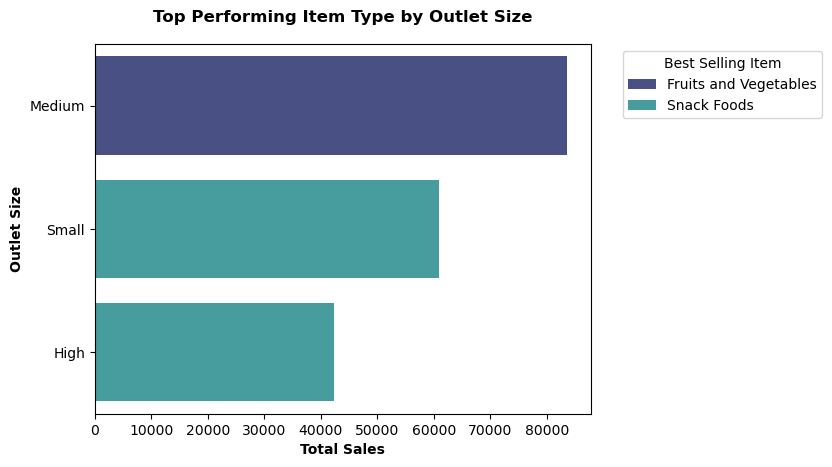

In [80]:
plot = sns.barplot(
    data = top_item_per_outlet_size, 
    y = 'outlet_size', 
    x = 'sales', 
    hue = 'item_type', 
    palette = 'mako',
    dodge = False

)

plt.title('Top Performing Item Type by Outlet Size', fontsize=12, pad=16, weight = 'bold')
plt.xlabel('Total Sales', fontsize=10, weight = 'bold')
plt.ylabel('Outlet Size', fontsize=10, weight = 'bold')
plt.legend(title='Best Selling Item', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

**Insight: Sales by Item Type Across Outlet Sizes**

- Different outlet sizes are driven by different top-performing item categories.

- Medium-sized outlets generate the highest sales from Fruits and Vegetables, indicating strong demand for fresh produce in mid-sized stores.

- Small and High outlet sizes are both dominated by Snack Foods, suggesting that packaged and convenience items perform better in these store formats.

- This variation shows that customer purchasing behavior differs by outlet size, and product assortment should be tailored accordingly rather than using a one-size-fits-all strategy.

#### Why medium size outlet generate the highest total sales vy Fruits and Vegetables??

In [171]:
count_pivot = df.pivot_table(
    index = 'item_type',
    columns = 'outlet_size',
    values = 'sales',
    aggfunc = 'count'
)

count_pivot['Total'] = count_pivot.sum(axis = 1)
count_pivot = count_pivot.sort_values(by = "Total", ascending = False)
count_pivot = count_pivot.drop(columns = "Total")

count_pivot

outlet_size,High,Medium,Small
item_type,,,
Fruits and Vegetables,242,585,405
Snack Foods,290,497,413
Household,146,374,390
Frozen Foods,183,355,318
Dairy,139,297,246
Canned,137,281,231
Baking Goods,153,268,227
Health and Hygiene,61,221,238
Soft Drinks,104,161,180


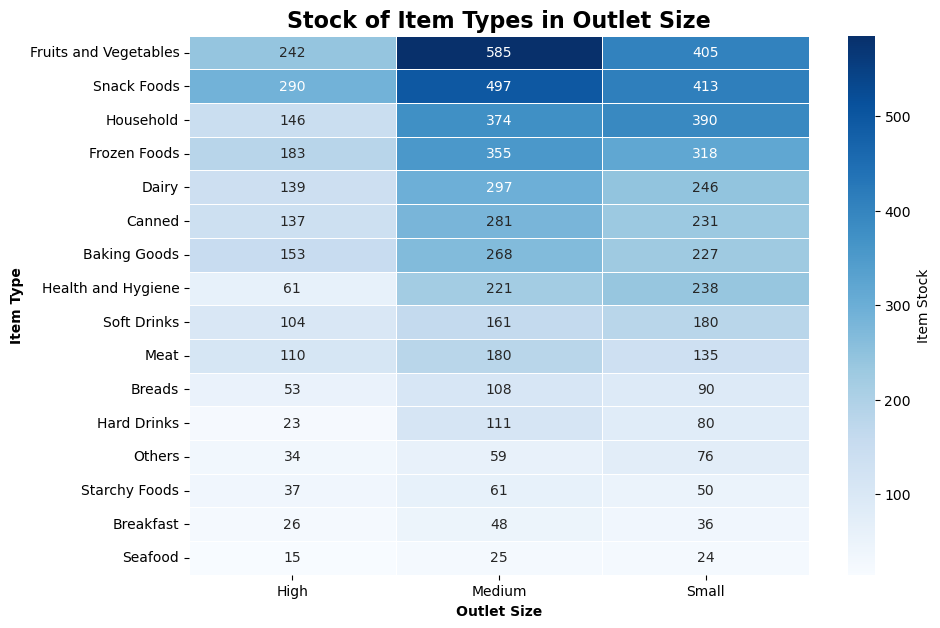

In [173]:
plt.figure(figsize = (10, 7))
sns.heatmap(
    data = count_pivot,
    annot = True,
    fmt = '.0f',
    linewidths = 0.5,
    cmap = 'Blues',
    cbar_kws={'label': 'Item Stock'}
)

plt.title('Stock of Item Types in Outlet Size', fontsize=16, weight='bold')
plt.xlabel('Outlet Size', weight = 'bold')
plt.ylabel('Item Type', weight = 'bold')
plt.show()

**Answer of  Why medium size outlet generate the highest total sales by Fruits and Vegetables:** 

The variation in top-performing item types across outlet sizes is largely driven by stock availability and outlet strategy. Medium-sized outlets maintain significantly higher stock levels of Fruits and Vegetables, leading to greater availability, higher purchase frequency, and ultimately higher total sales for fresh produce. In contrast, Small and High outlet sizes are dominated by Snack Foods, as these formats either prioritize quick purchases or support high-volume packaged goods. This indicates that sales performance is strongly influenced by how product assortments are aligned with outlet size rather than by item type alone.

### C. Do every outlets sell different item types than each other?

In [83]:
comparision_pivot = df.pivot_table(
    index = 'item_type',
    columns = 'outlet_type',
    values = 'sales',
    aggfunc = 'sum'
)

comparision_pivot['Total'] = comparision_pivot.sum(axis=1)
comparision_pivot = comparision_pivot.sort_values('Total', ascending=False)
comparision_pivot = comparision_pivot.drop(columns='Total')

comparision_pivot

outlet_type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
item_type,,,,
Fruits and Vegetables,21423.4146,117431.9880,18967.2918,20301.3866
Snack Foods,21327.8402,114296.1322,20003.2424,19806.7076
Household,18082.1094,89143.4092,14244.6486,14506.3582
Frozen Foods,13750.4410,79348.3770,13253.7174,12206.3460
Dairy,13539.3398,67179.6940,10638.9446,9918.4832
Canned,10079.8990,59649.3094,10852.4710,10125.0496
Baking Goods,10747.2358,53665.4614,8594.2014,8887.8378
Health and Hygiene,8964.0234,44050.7466,7339.9238,7671.1450
Meat,9081.0488,36169.7586,6365.9350,7833.1214


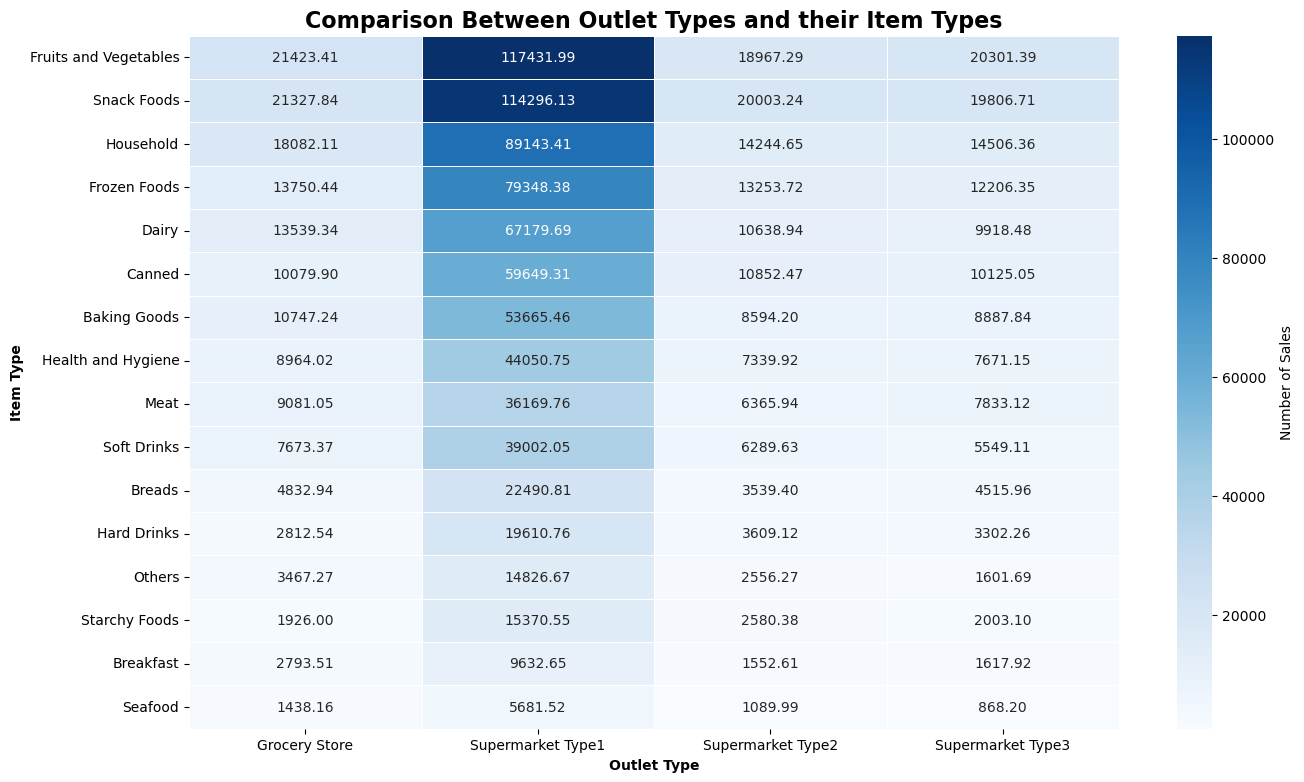

In [84]:
plt.figure(figsize = (15, 9))
sns.heatmap(
    data = comparision_pivot,
    annot = True,
    fmt = '.2f',
    linewidths = 0.5,
    cmap = 'Blues',
    cbar_kws={'label': 'Number of Sales'}
)

plt.title('Comparison Between Outlet Types and their Item Types', fontsize=16, weight='bold')
plt.xlabel('Outlet Type', weight = 'bold')
plt.ylabel('Item Type', weight = 'bold')
plt.show()

**Insight: Item Type Sales Across Outlet Types**

- The heatmap reveals that all outlet types offer a similar range of item categories, indicating a standardized product assortment across the retail network.

- Supermarket Type1 consistently generates the highest sales across nearly all item types, making it the strongest revenue-contributing outlet.

- Core categories such as Fruits and Vegetables, Snack Foods, Household, and Frozen Foods dominate sales in every outlet type, while categories like Seafood and Breakfast remain low-performing across the board.

- This suggests that sales performance is driven more by outlet scale and customer volume rather than differences in product mix.



**Key Insight: Top Sales Contributors**

- The heatmap shows that Supermarket Type1 contributes the highest total sales across all outlet types.

- Within Supermarket Type1, Fruits and Vegetables is the top-performing item category, generating the highest sales.

- This indicates that large-format supermarkets combined with high-demand fresh categories drive the majority of revenue.

- Other outlet types follow a similar category pattern but at significantly lower sales volumes.

### D. Top-performing combinations of outlet_size and location

In [88]:
performance_pivot = df.pivot_table(
    index = 'outlet_size',
    columns = 'outlet_location_type',
    values = 'sales',
    aggfunc = 'sum'
)

performance_pivot['Total'] = performance_pivot.sum(axis = 1)
performance_pivot = performance_pivot.sort_values(by = 'Total', ascending = False)
performance_pivot = performance_pivot.drop(columns = 'Total')

performance_pivot

outlet_location_type,Tier 1,Tier 2,Tier 3
outlet_size,,,
Medium,130476.8598,78048.3144,299370.5622
Small,205920.9522,230489.8858,8383.3324
High,NaN,84612.4474,164379.1386


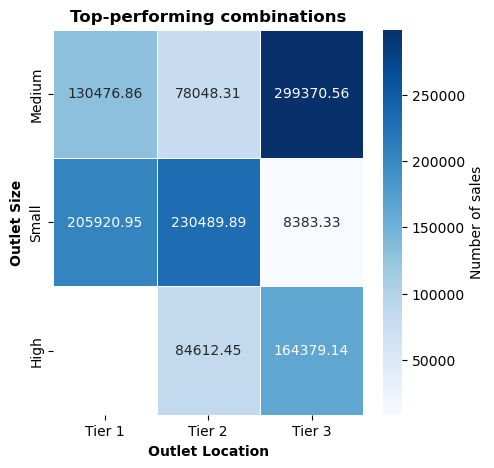

In [89]:
plt.figure(figsize = (5, 5))

sns.heatmap(
    data = performance_pivot,
    annot = True,
    fmt = '.2f',
    cmap = 'Blues',
    linewidths = 0.5,
    cbar_kws = {'label' : 'Number of sales'}
)

plt.title("Top-performing combinations", weight = 'bold')
plt.xlabel("Outlet Location", weight = 'bold')
plt.ylabel("Outlet Size", weight = 'bold')
plt.show()

**Top-Performing Outlet Size and Location Combinations**

- Medium-sized outlets in Tier 3 locations generate the highest total sales, making this the best-performing outlet size–location combination.

- Small outlets in Tier 2 and Tier 1 locations also show strong sales performance, indicating that smaller outlets can perform efficiently in suitable markets.

- High-sized outlets contribute comparatively lower total sales and are not present across all location tiers.

- Overall, this shows that sales performance depends on the right combination of outlet size and location, rather than outlet size alone.

### E. Which are the to 5 outlets contributes the most to total sales?

In [92]:
top_outlet_by_sales = (
    df.groupby("outlet_identifier")['sales']
    .sum()
).sort_values(ascending = False).reset_index().pipe(lambda d: d.set_index(d.index + 1)).head()

top_outlet_by_sales

,outlet_identifier,sales
1,OUT035,133103.9070
2,OUT046,132113.3698
3,OUT013,131809.0156
4,OUT018,131477.7764
5,OUT045,130942.7802


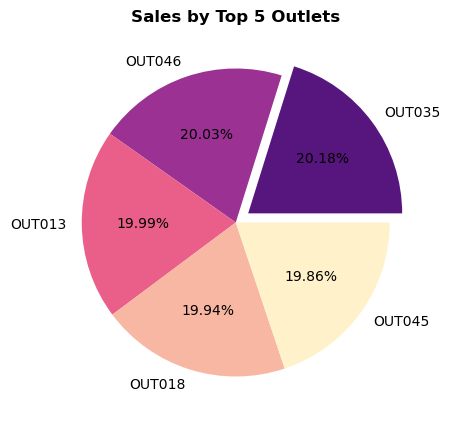

In [93]:
color = ['#57167E', '#9B3192', '#EA5F89', '#F7B7A3', '#FFF1C9']
explode = [0.1, 0.0, 0.0, 0.0, 0.0]

plt.figure(figsize = (5, 5))

plt.pie(
    x = top_outlet_by_sales['sales'], 
    labels = top_outlet_by_sales['outlet_identifier'], 
    autopct = "%1.2f%%", 
    colors = color,
    explode = explode
)

plt.title("Sales by Top 5 Outlets", weight = 'bold')
plt.show()

**Insight: Top 5 Outlets by Sales Contribution**

- The pie chart represents the relative sales contribution within the top 5 outlets only, not across the entire dataset.

- Among these top-performing outlets, sales are evenly distributed, with each outlet contributing roughly 19–20% of total sales within the top 5 group.

- This indicates that no single outlet dominates among the highest-performing outlets.

- The balanced distribution suggests consistent performance across top outlets rather than reliance on one exceptional location.